# UMAPs Neurips samples, NK cells

In this notebook two AML samples (EG48 and EG49) are studied separately. NK cells are identified based on clustering results of both samples together and then data is subset so that only NK cells from each sample are selected. UMAPs are generates using latent space coordinates. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG48_norm.h5ad')

In [3]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG49_norm.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 1734 × 13679
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata1

AnnData object with n_obs × n_vars = 2111 × 14711
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata, use_rep="X_totalVI")    

sc.tl.umap(adata)


In [7]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata1, use_rep="X_totalVI")    

sc.tl.umap(adata1)

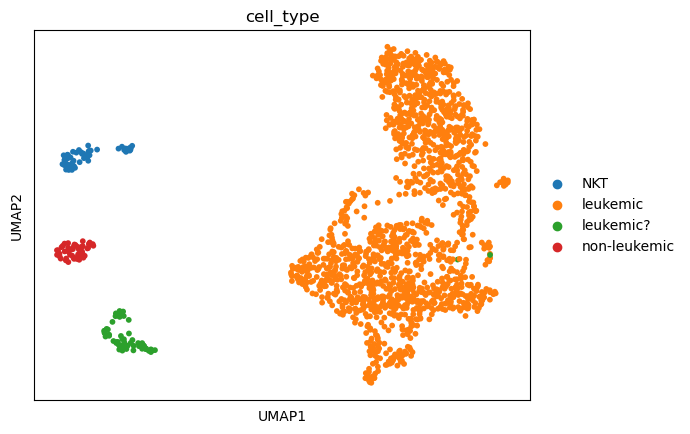

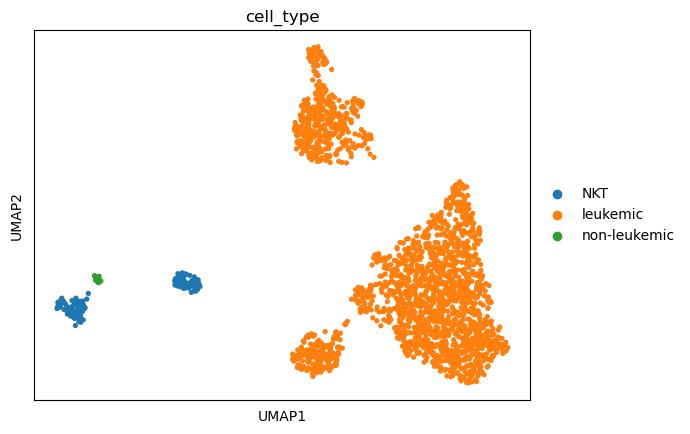

In [8]:
#latent space

sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')
sc.pl.umap(adata1, color = ['cell_type'], color_map = 'viridis')

In [9]:
adata_merged = adata.concatenate(adata1, index_unique=None)

In [10]:
adata_merged.obs['cell_type']

AAACCTGAGCGATGAC-1-105    leukemic
AAACCTGCAGACACTT-1-105    leukemic
AAACCTGGTCCATCCT-1-105    leukemic
AAACCTGTCCGGGTGT-1-105    leukemic
AAACGGGAGTGTACGG-1-105    leukemic
                            ...   
TTTGGTTTCGGCTTGG-1-116    leukemic
TTTGGTTTCTATCGCC-1-116    leukemic
TTTGTCAAGAAGAAGC-1-116    leukemic
TTTGTCACAGTTAACC-1-116    leukemic
TTTGTCATCCAGAGGA-1-116    leukemic
Name: cell_type, Length: 3845, dtype: object

In [11]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [12]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [13]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [14]:
adata_merged

AnnData object with n_obs × n_vars = 3845 × 13376
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_express

In [15]:
#save the file!

adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/AML_norm.h5ad')

In [16]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

In [17]:
adata_merged.X

<3845x13376 sparse matrix of type '<class 'numpy.float32'>'
	with 9627706 stored elements in Compressed Sparse Row format>

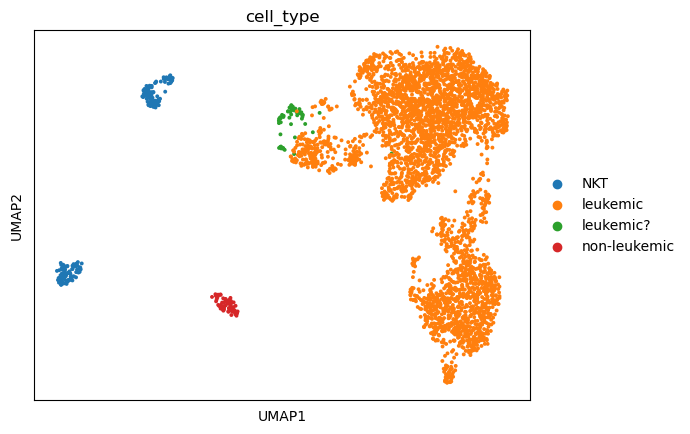

In [18]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

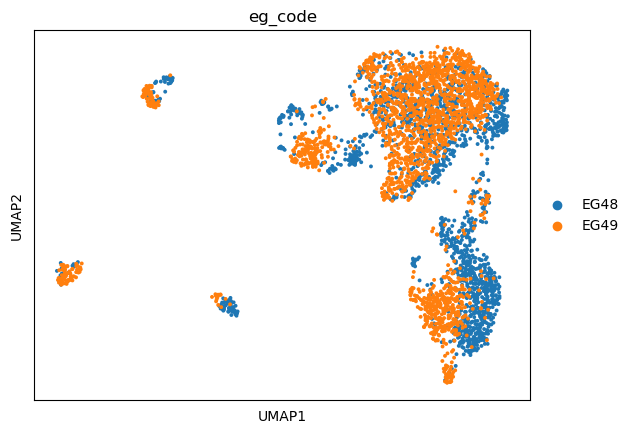

In [19]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [22]:
sc.tl.leiden(adata_merged, resolution = 1, key_added = "leiden_1")

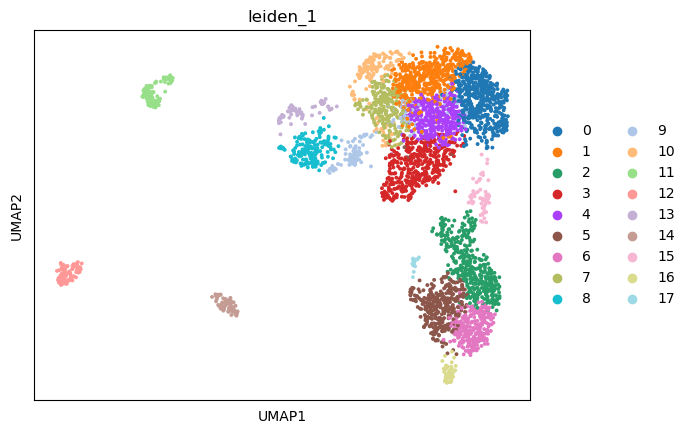

In [23]:
sc.pl.umap(adata_merged, color=['leiden_1'], ncols =3)

In [28]:
#selecting NK cell cluster
adata_nk = adata_merged[adata_merged.obs['leiden_1'] == "4"]

In [159]:
adata_nk

View of AnnData object with n_obs × n_vars = 347 × 13376
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'neighbors', 'umap', 'cell_type_colors', 'eg_code_co

In [29]:
eg48 = adata_nk[adata_nk.obs['eg_code'] == "EG48"]

eg48.shape

(100, 13376)

In [30]:
eg49 = adata_nk[adata_nk.obs['eg_code'] == "EG49"]

eg49.shape

(247, 13376)

In [46]:
#Removing mitochondrial and ribosomal genes

#genes to be removed
mito_genes = eg48.var_names.str.startswith('MT-')
ribo_genes = eg48.var_names.str.startswith('RPL')
ribo_genes1 = eg48.var_names.str.startswith('RPS')

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, ribo_genes1)

#other genes kept
keep = np.invert(remove)

eg48 = eg48[:,keep]

#print(adata_gex.n_obs, adata_gex.n_vars)

In [47]:
#Removing mitochondrial and ribosomal genes

#genes to be removed
mito_genes = eg49.var_names.str.startswith('MT-')
ribo_genes = eg49.var_names.str.startswith('RPL')
ribo_genes1 = eg49.var_names.str.startswith('RPS')

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, ribo_genes1)

#other genes kept
keep = np.invert(remove)

eg49 = eg49[:,keep]

#print(adata_gex.n_obs, adata_gex.n_vars)

In [48]:
#calculating neigbors for object containing only NK cells

sc.pp.neighbors(eg48, use_rep="X_totalVI")

sc.tl.umap(eg48)

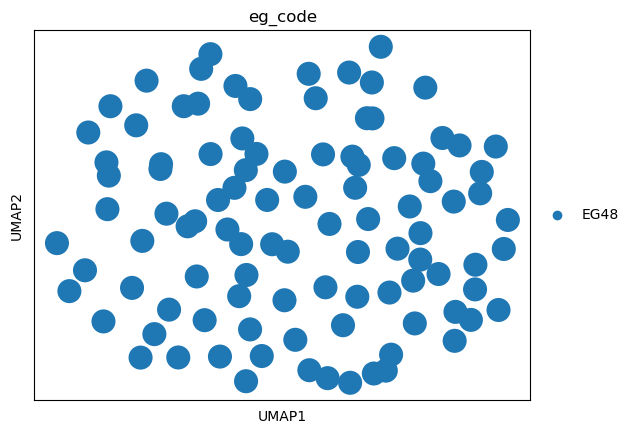

In [49]:
sc.pl.umap(eg48, color = ["eg_code"])

In [50]:
#Calculating leidens for latent object
sc.tl.leiden(eg48, resolution = 0.5, key_added = "leiden_0.5")
sc.tl.leiden(eg48, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(eg48, resolution = 0.7, key_added = "leiden_0.7")


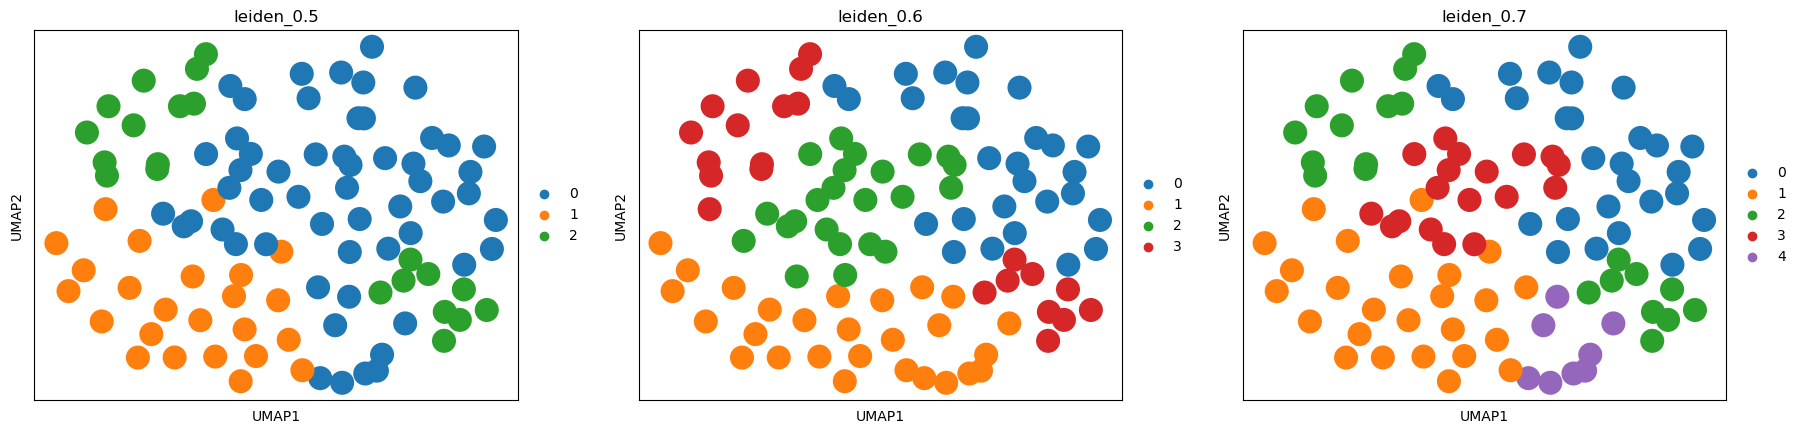

In [51]:
sc.pl.umap(eg48, color=['leiden_0.5', 'leiden_0.6', 'leiden_0.7'], ncols =3)

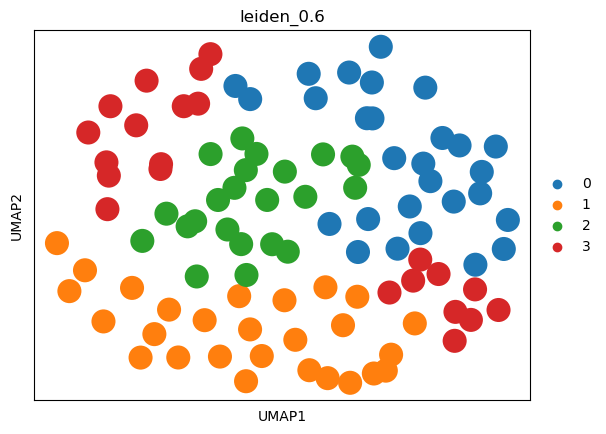

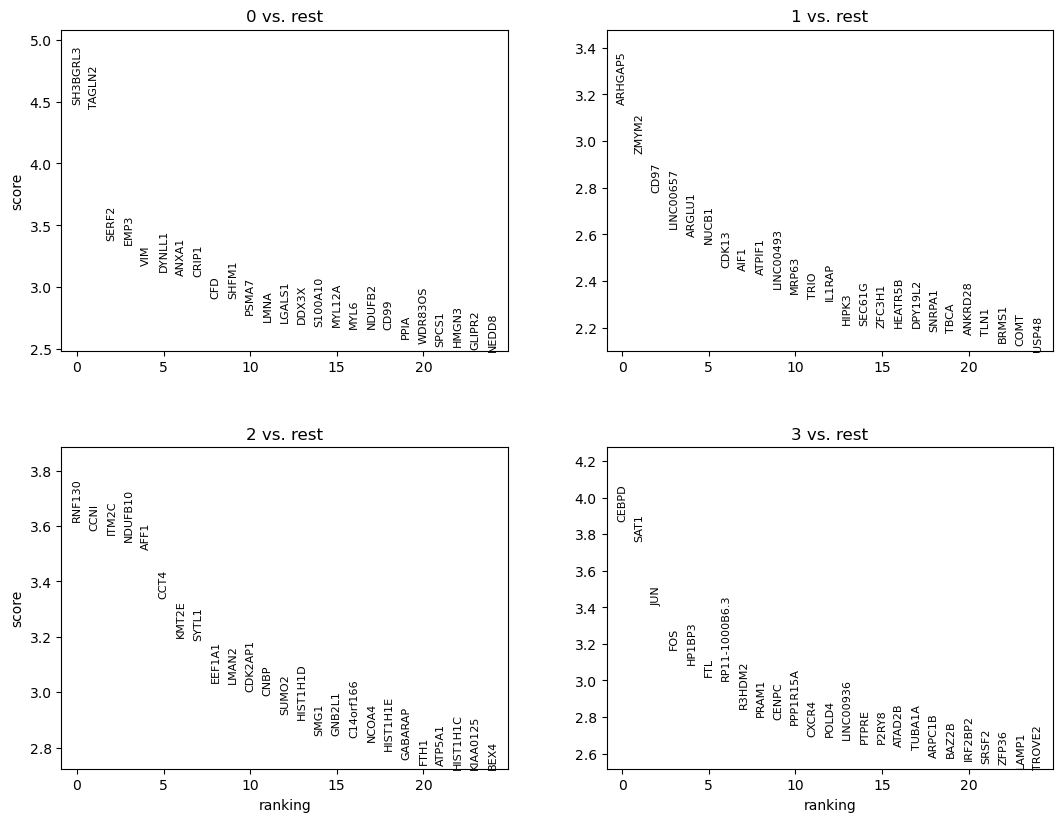

In [52]:
sc.pl.umap(eg48, color=['leiden_0.6'], ncols =3)

sc.tl.rank_genes_groups(eg48, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(eg48, n_genes=25, sharey=False, ncols=2)

In [53]:
#calculating neigbors for object containing only NK cells

sc.pp.neighbors(eg49, use_rep="X_totalVI")

sc.tl.umap(eg49)

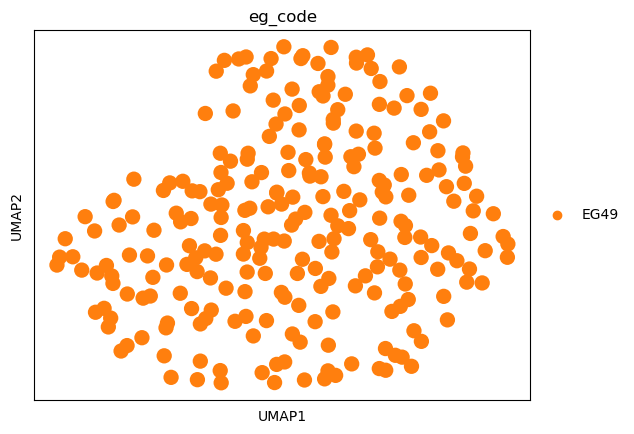

In [54]:
sc.pl.umap(eg49, color = ["eg_code"])

In [55]:
#Calculating leidens for latent object
sc.tl.leiden(eg49, resolution = 0.5, key_added = "leiden_0.5")
sc.tl.leiden(eg49, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(eg49, resolution = 0.7, key_added = "leiden_0.7")

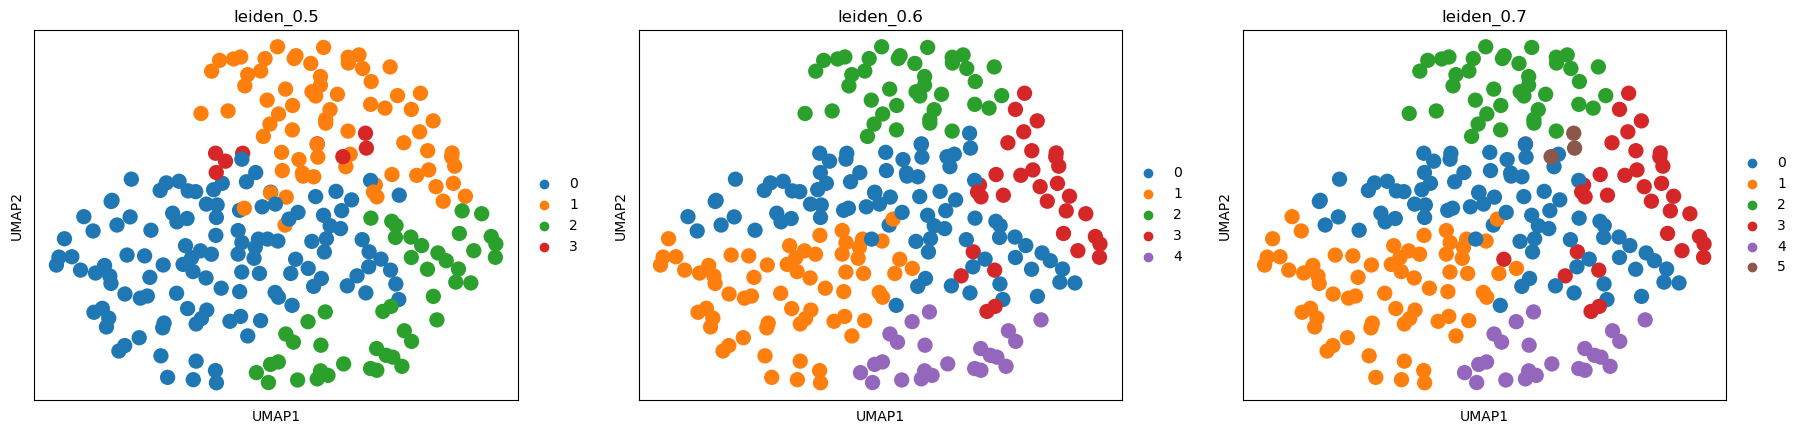

In [56]:
sc.pl.umap(eg49, color=['leiden_0.5', 'leiden_0.6', 'leiden_0.7'], ncols =3)

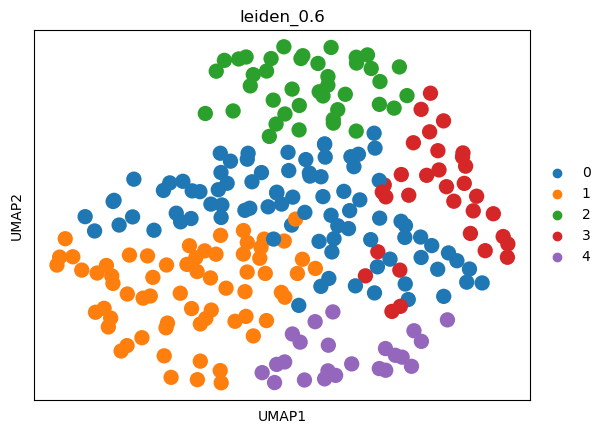

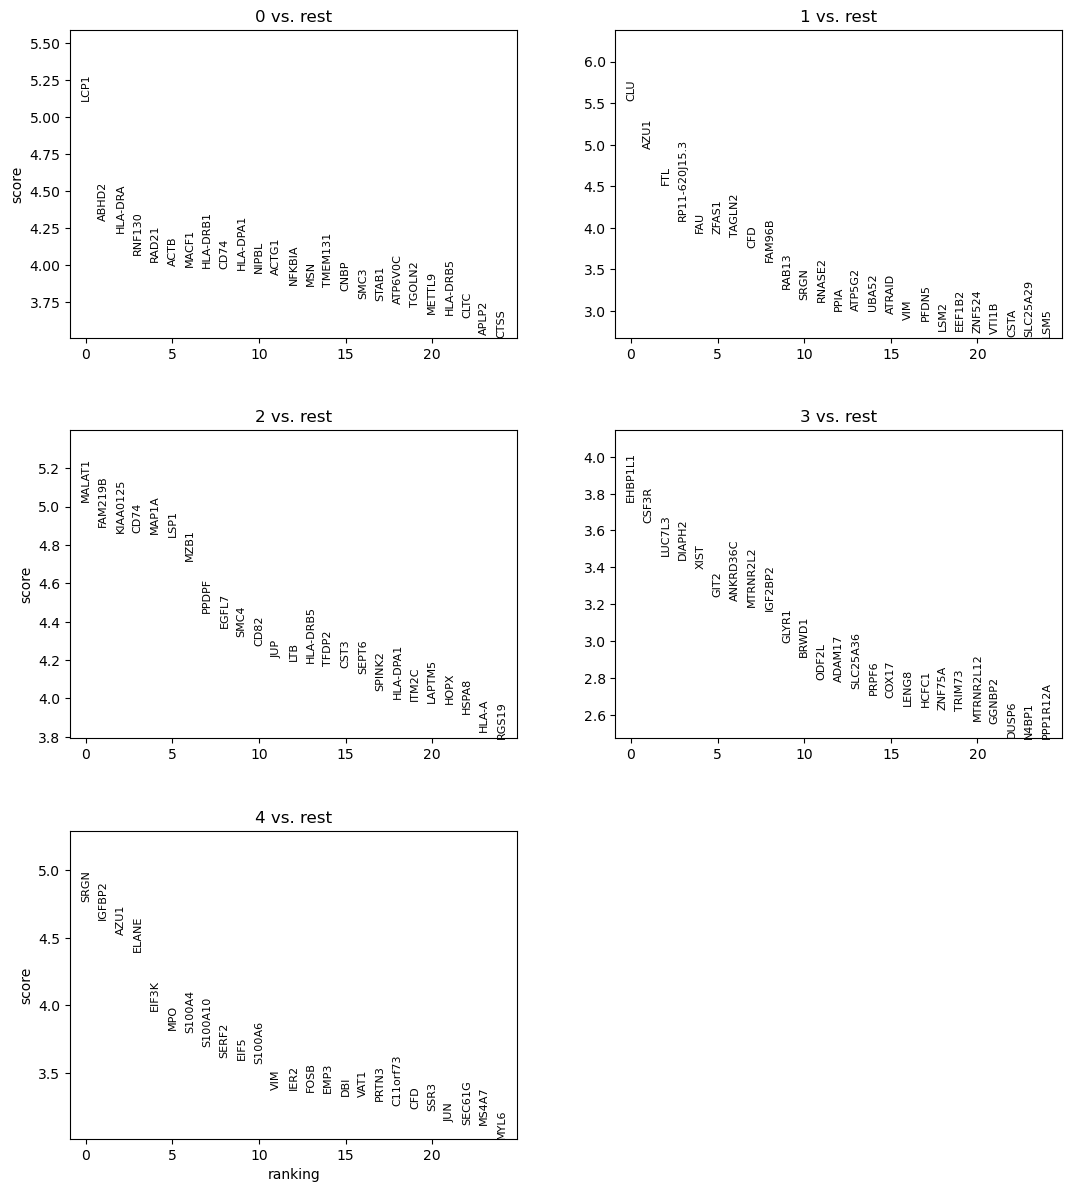

In [57]:
sc.pl.umap(eg49, color=['leiden_0.6'], ncols =3)

sc.tl.rank_genes_groups(eg49, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(eg49, n_genes=25, sharey=False, ncols=2)

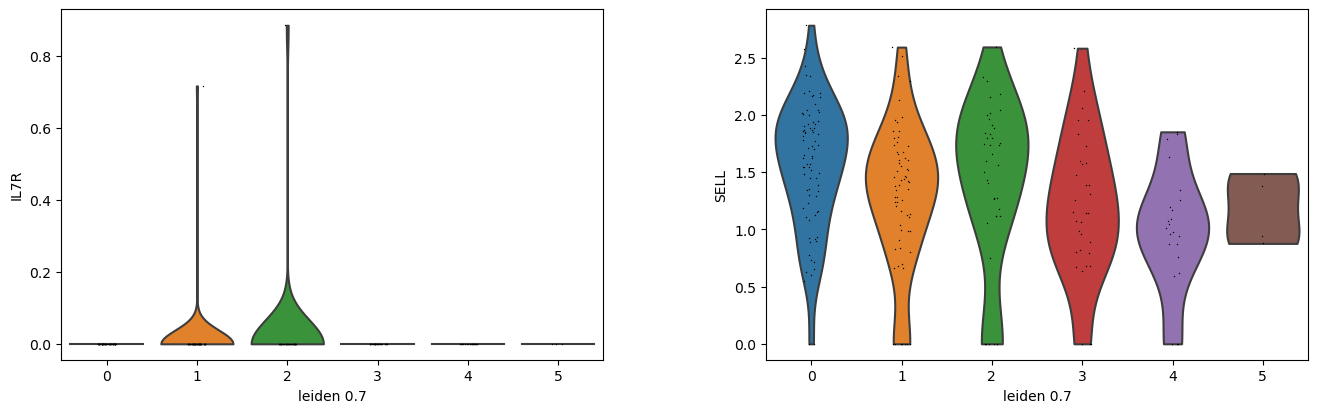

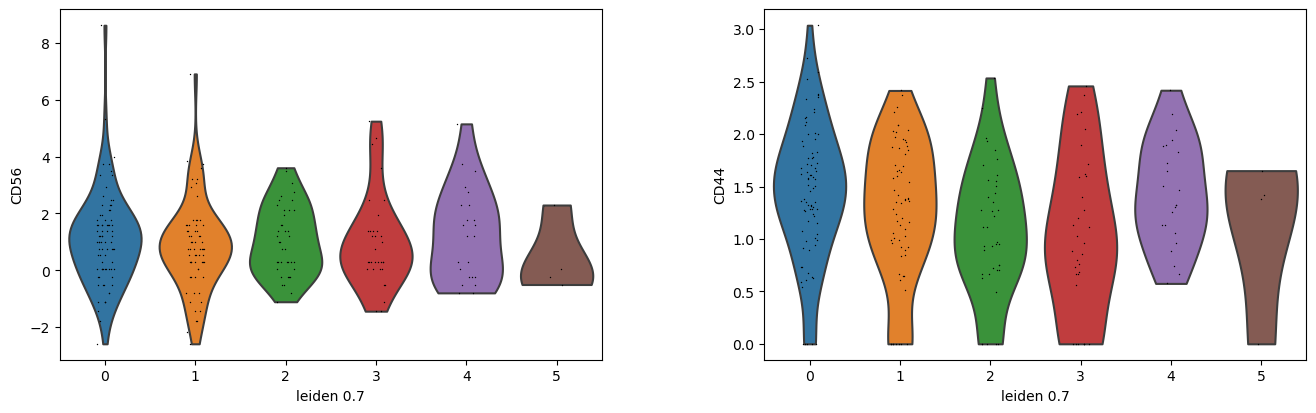

In [60]:
#CD56bright markers

sc.pl.violin(eg49, ['IL7R', 'SELL'], groupby='leiden_0.7')

sc.pl.violin(eg49, ['CD56', 'CD44'], groupby='leiden_0.7')

RNA markers


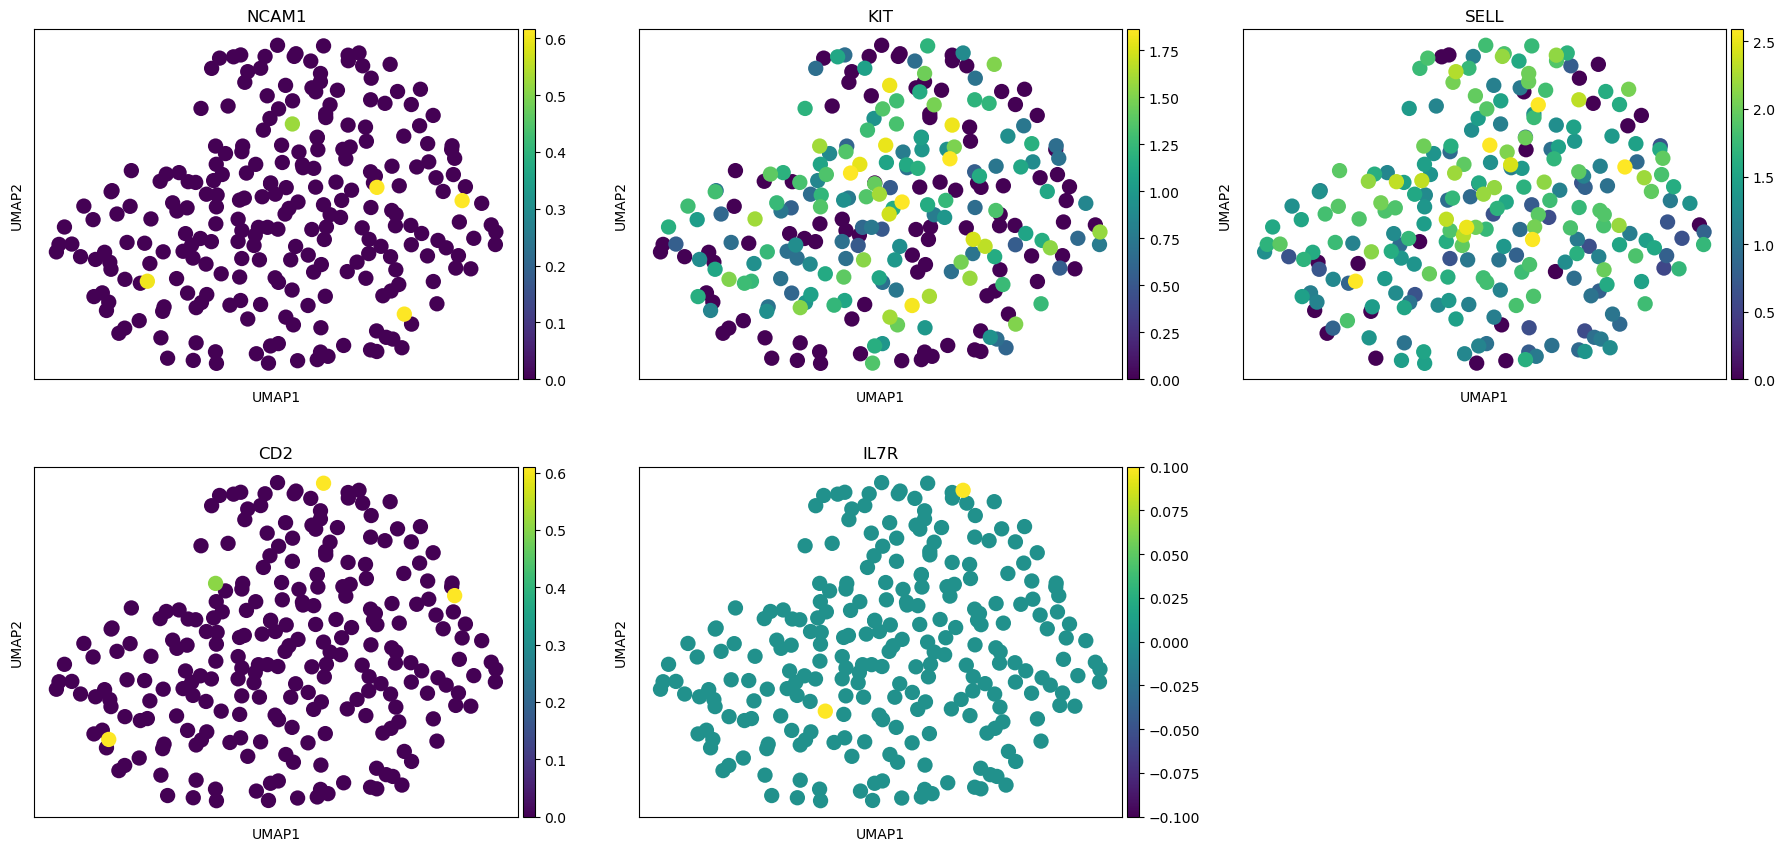

Protein markers


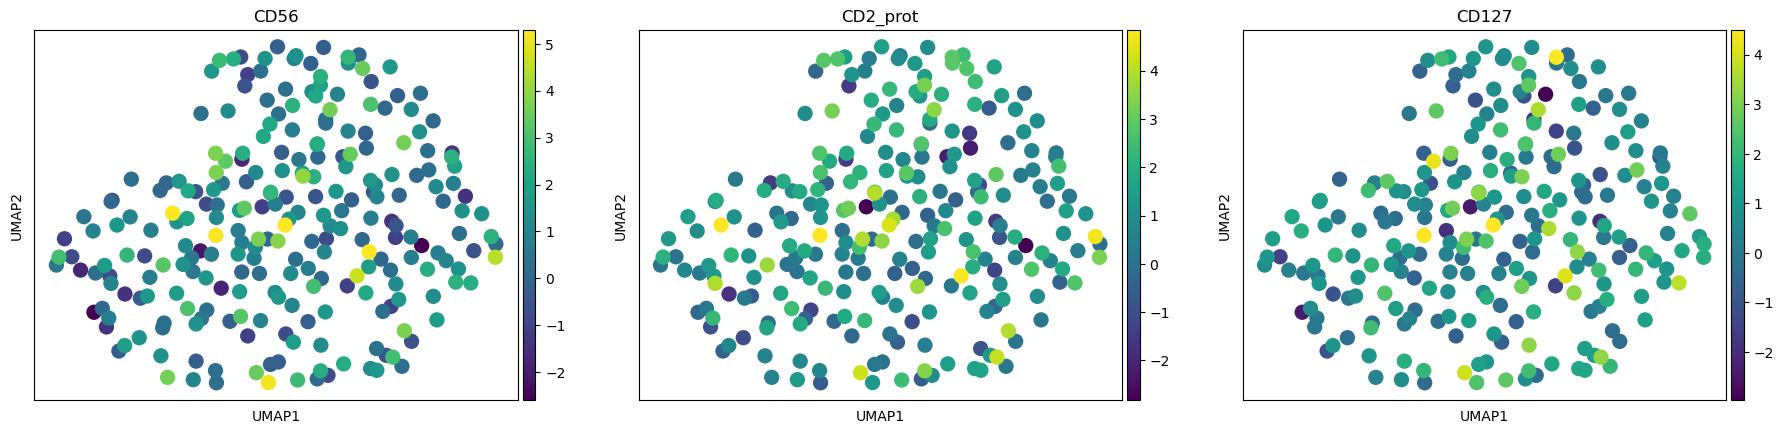

In [61]:
#CD56bright NK cells
#SELL = CD62L, NCAM1 = CD56, IL7R = CD127

cd56bright_mels = ['NCAM1', 'KIT', 'SELL', 'CD2', 'IL7R'] #KLRC1 not found
cd56bright_mels_prot= ['CD56', "CD2_prot", 'CD127'] #CD62L not measured

print("RNA markers")
sc.pl.umap(eg49, color=cd56bright_mels, ncols = 3, vmax="p99")

print("Protein markers")

sc.pl.umap(eg49, color=cd56bright_mels_prot, ncols = 3, vmax="p99")

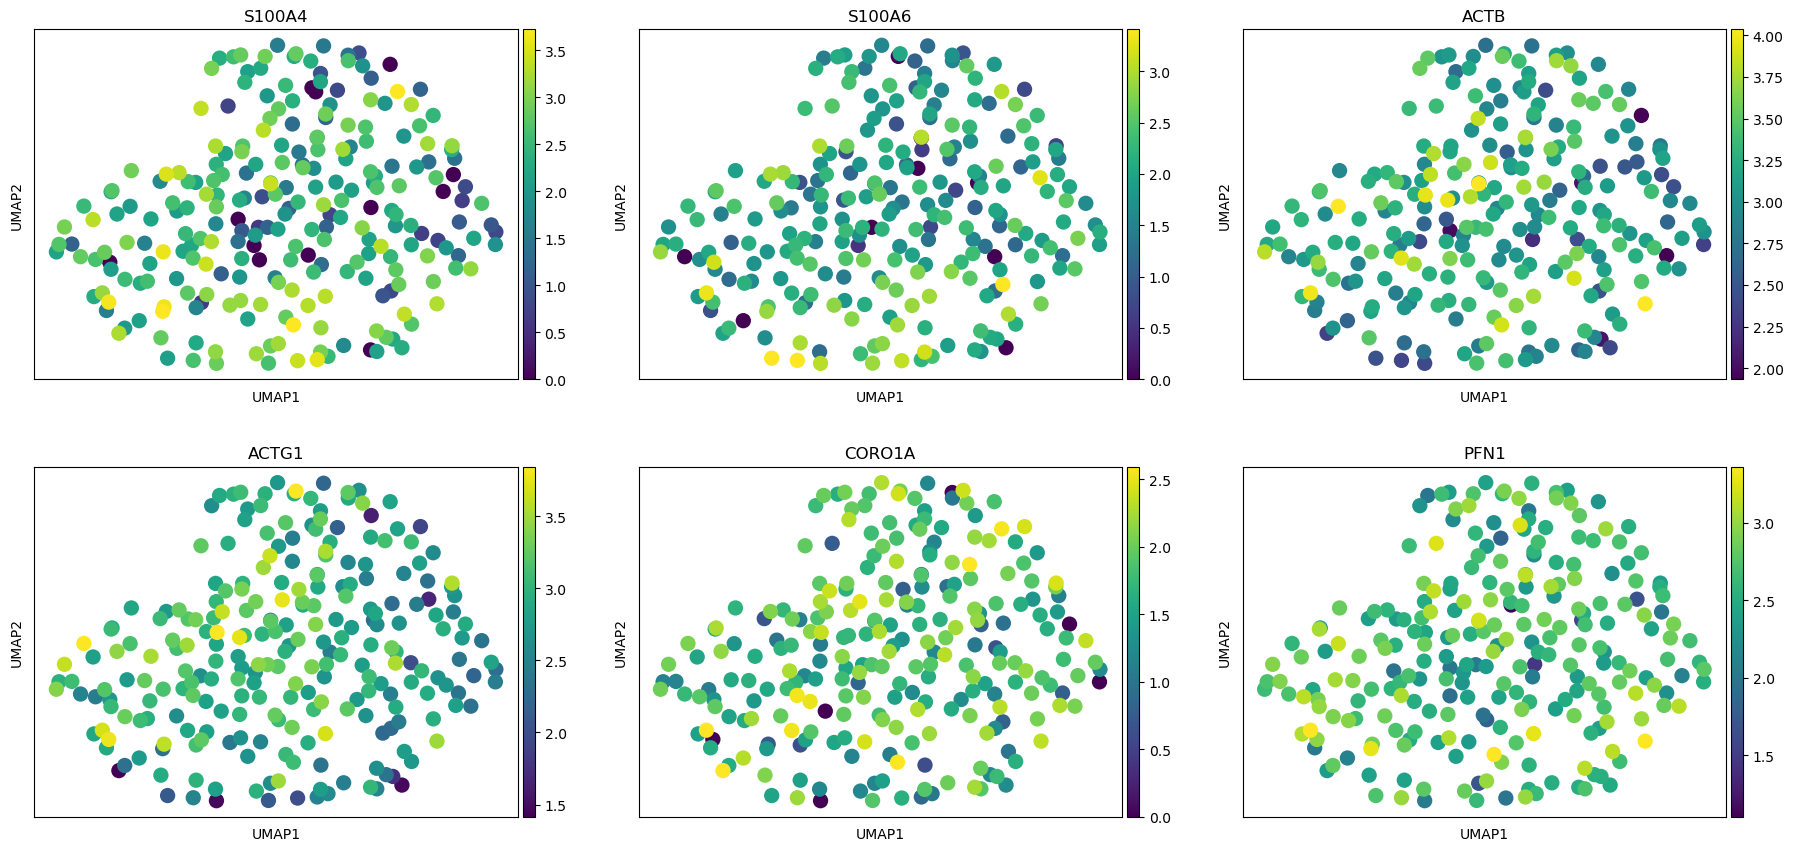

In [62]:
#Mature NK cells

cd56dim_1_high= ['S100A4', 'S100A6', 'ACTB', 'ACTG1', 'CORO1A', 'PFN1']
# cd56dim_1_low = ['GZMK'] not measured

sc.pl.umap(eg49, color=cd56dim_1_high, ncols = 3, vmax="p99")
#sc.pl.umap(adata_nk, color=cd56dim_1_low, ncols = 3, vmax="p99")



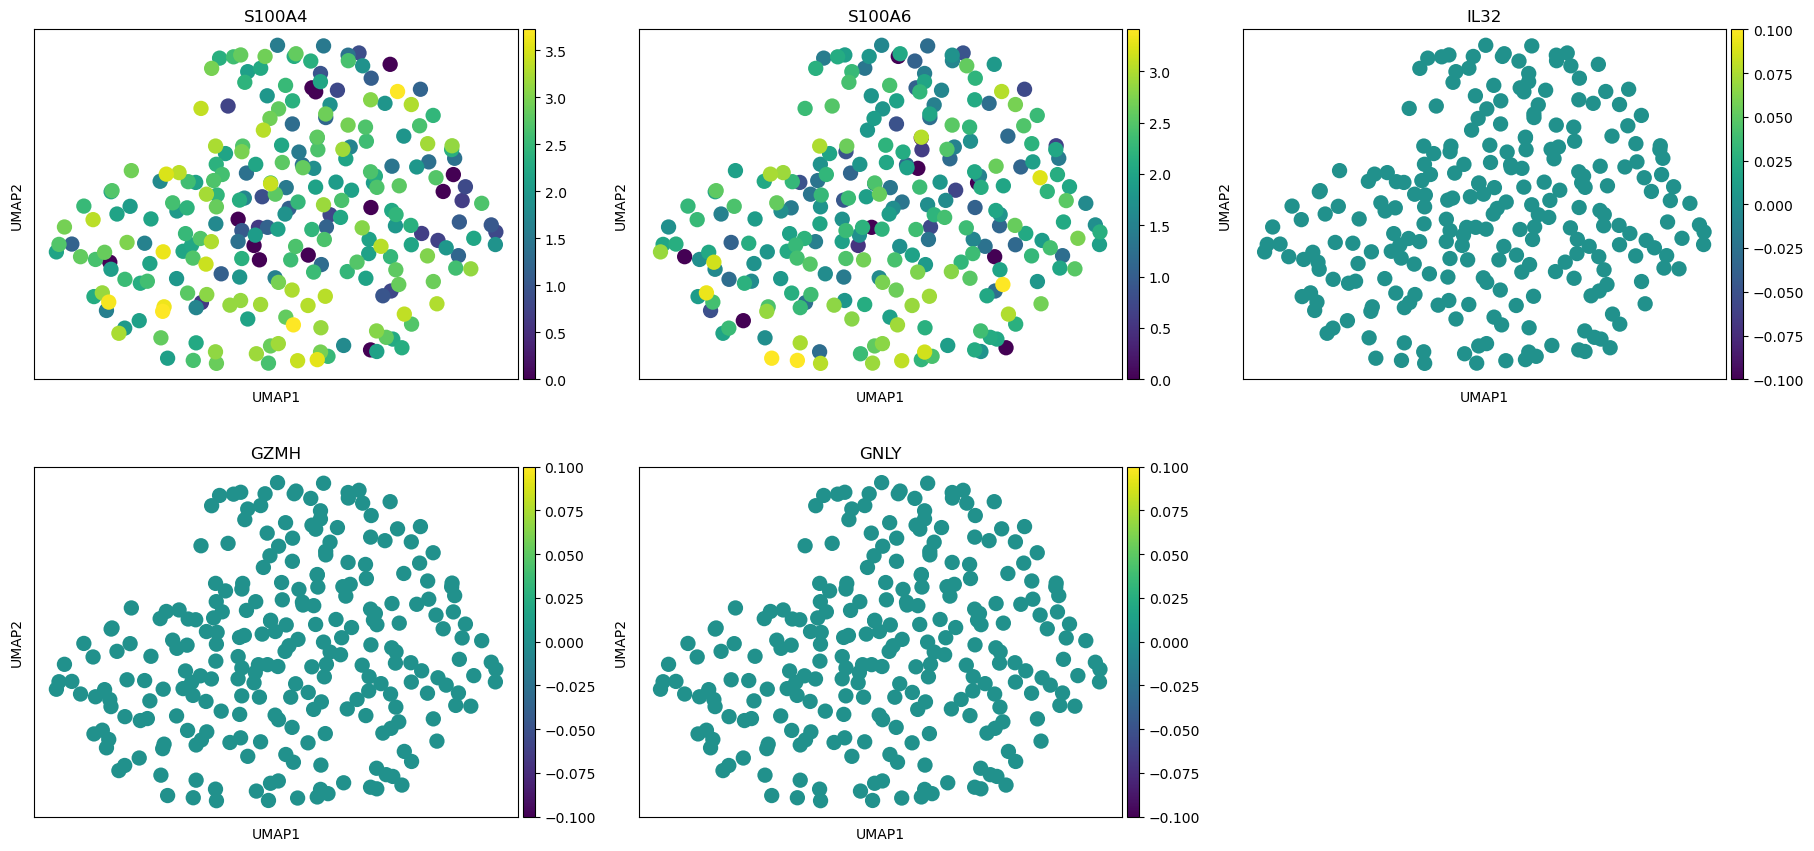

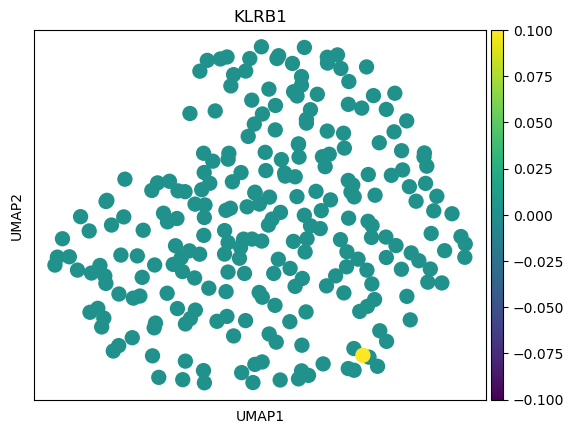

In [64]:
#proliferating NK

prolif_high = ['S100A4', 'S100A6', 'IL32', 'GZMH', 'GNLY'] #KLRC2 not found
prolif_low = ['KLRB1'] #KLRC1 not found

sc.pl.umap(eg49, color=prolif_high, ncols = 3, vmax="p99")
sc.pl.umap(eg49, color=prolif_low, ncols = 3, vmax="p99")

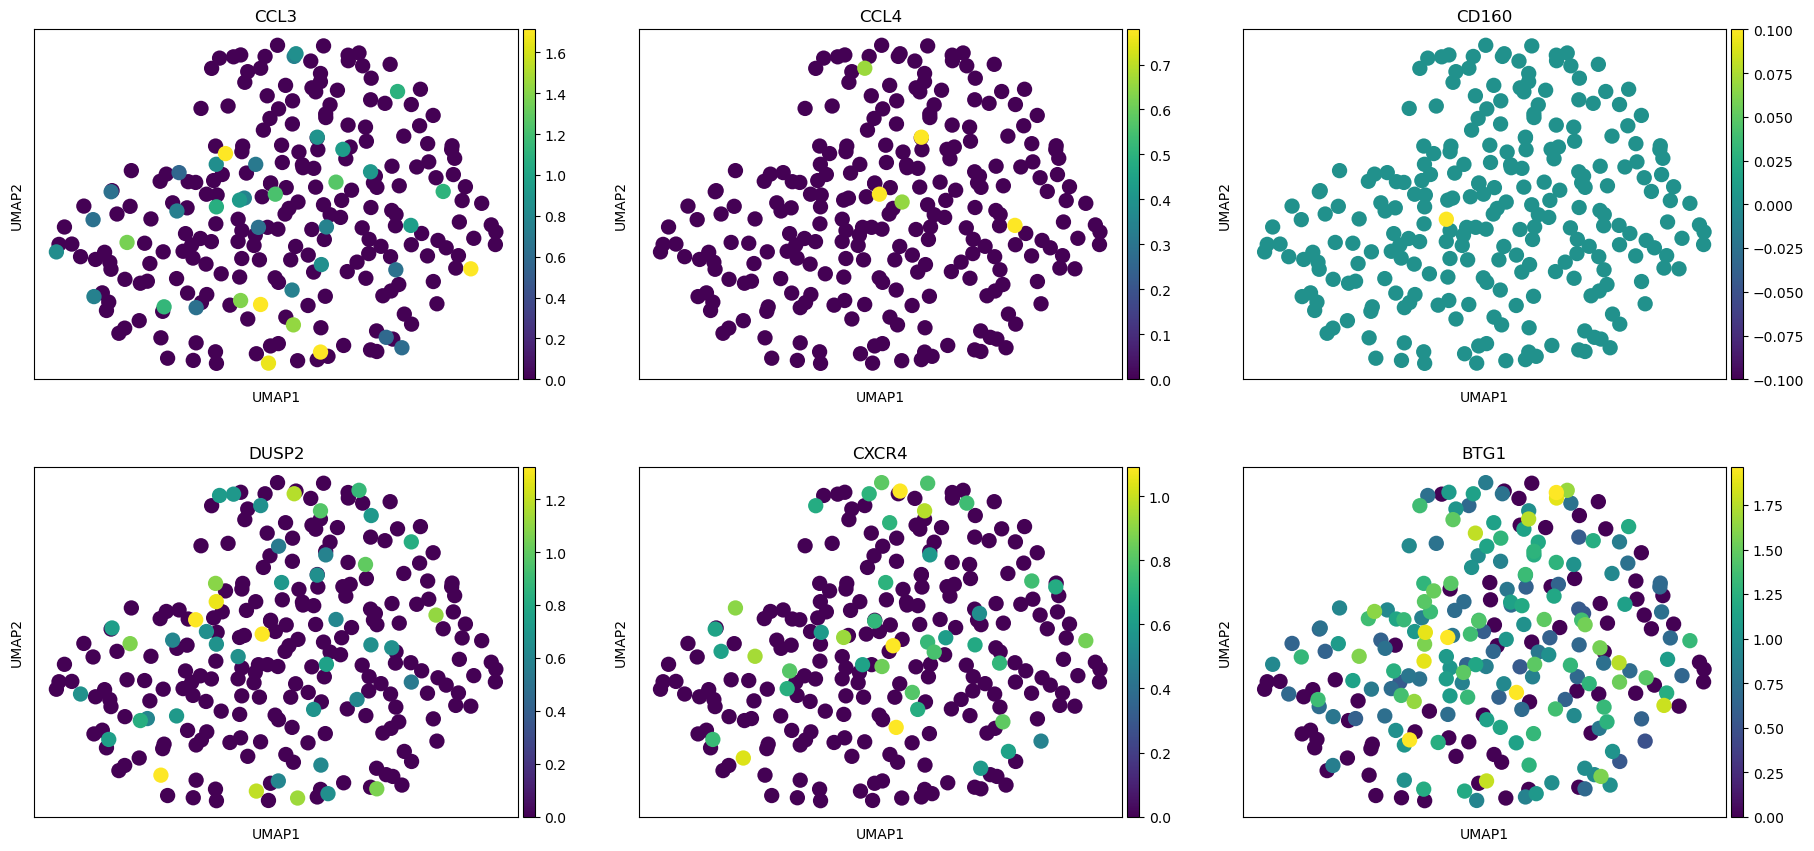

In [65]:
#Tissue-resident NK

tr_mels= ['CCL3', 'CCL4', 'CD160', 'DUSP2', 'CXCR4', 'BTG1'] #XCL1, GZMK not found

sc.pl.umap(eg49, color=tr_mels, ncols = 3, vmax="p99")